In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

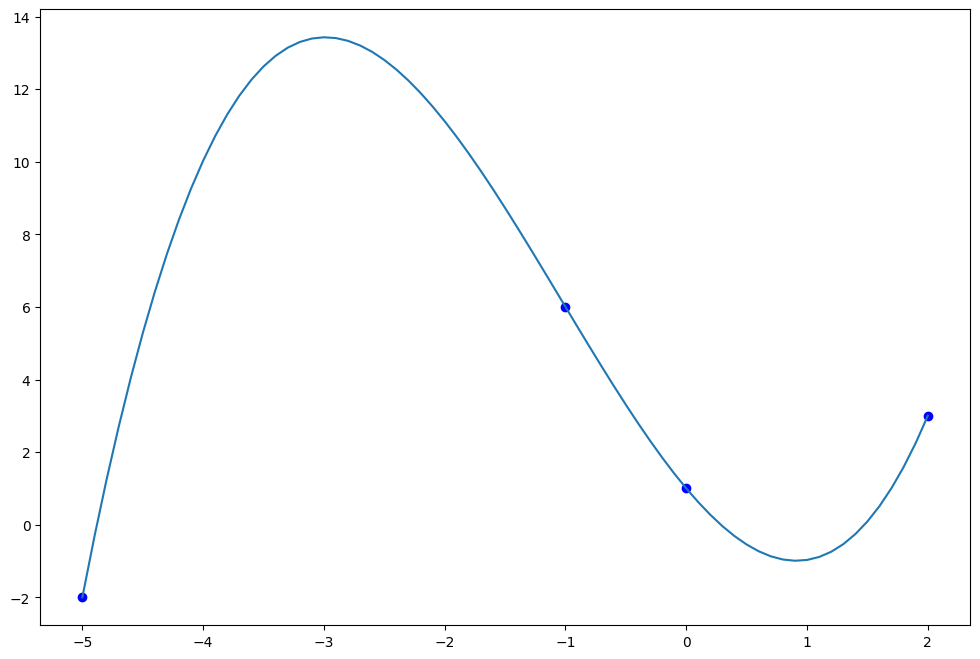

In [6]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

Табличне задання функції, для x обрав 20 точок:
x: 1.0000, y: 0.0000e+00
x: 1.4737, y: 0.3878
x: 1.9474, y: 0.6665
x: 2.4211, y: 0.8842
x: 2.8947, y: 1.0629
x: 3.3684, y: 1.2144
x: 3.8421, y: 1.3460
x: 4.3158, y: 1.4623
x: 4.7895, y: 1.5664
x: 5.2632, y: 1.6607
x: 5.7368, y: 1.7469
x: 6.2105, y: 1.8262
x: 6.6842, y: 1.8997
x: 7.1579, y: 1.9682
x: 7.6316, y: 2.0323
x: 8.1053, y: 2.0925
x: 8.5789, y: 2.1493
x: 9.0526, y: 2.2031
x: 9.5263, y: 2.2541
x: 10.0000, y: 2.3026

Скінченні різниці:

Порядок d^1y:
  d^1y[0] = y[1] - y[0] = 0.3878 - 0.0000e+00 = 0.3878
  d^1y[1] = y[2] - y[1] = 0.6665 - 0.3878 = 0.2787
  d^1y[2] = y[3] - y[2] = 0.8842 - 0.6665 = 0.2177
  d^1y[3] = y[4] - y[3] = 1.0629 - 0.8842 = 0.1787
  d^1y[4] = y[5] - y[4] = 1.2144 - 1.0629 = 0.1515
  d^1y[5] = y[6] - y[5] = 1.3460 - 1.2144 = 0.1316
  d^1y[6] = y[7] - y[6] = 1.4623 - 1.3460 = 0.1163
  d^1y[7] = y[8] - y[7] = 1.5664 - 1.4623 = 0.1041
  d^1y[8] = y[9] - y[8] = 1.6607 - 1.5664 = 0.0943
  d^1y[9] = y[10] - y[9] = 1.

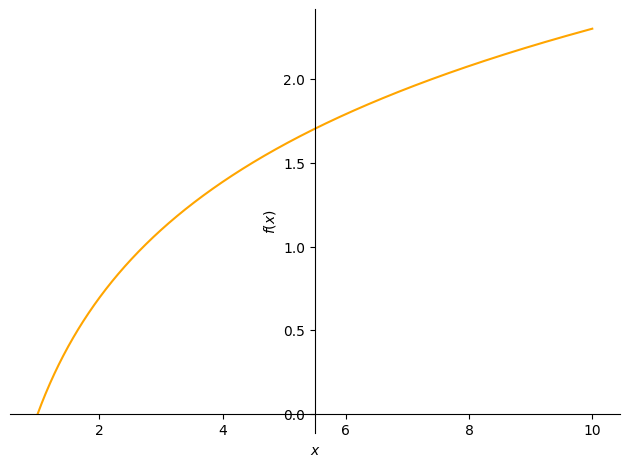

In [32]:
from sympy import symbols, expand, plot
import math
from tabulate import tabulate  # Додаємо бібліотеку для красивого форматування таблиць

def format_number(value):
    """Форматує число, використовуючи наукову нотацію для дуже малих значень."""
    if abs(value) < 1e-4:  # Якщо значення дуже маленьке, використовуємо наукову нотацію
        return f"{value:.4e}"
    else:
        return f"{value:.4f}"

def print_diff_table(X, Y, diffs):
    """Виводить таблицю скінченних різниць."""
    # Підготовка даних для таблиці
    headers = ['x', 'y']
    headers.extend([f'Δ^{i}y' for i in range(1, len(diffs))])
    
    # Створення рядків таблиці
    rows = []
    for i in range(len(X)):
        row = [format_number(X[i]), format_number(Y[i])]
        for diff_level in range(1, len(diffs)):
            if i < len(diffs[diff_level]):
                row.append(format_number(diffs[diff_level][i]))
            else:
                row.append('')
        rows.append(row)
    
    # Виведення таблиці
    print("\nТаблиця скінченних різниць:")
    print(tabulate(rows, headers=headers, tablefmt='grid', stralign='right'))

def fin_diff(X, Y):
    """Обчислює таблицю скінченних різниць з покроковими розрахунками."""
    diffs = [Y.copy()]
    print("Скінченні різниці:")
    for i in range(1, len(Y)):
        current_diff = []
        print(f"\nПорядок d^{i}y:")
        for j in range(len(diffs[-1]) - 1):
            diff_value = diffs[-1][j + 1] - diffs[-1][j]
            current_diff.append(diff_value)
            print(f"  d^{i}y[{j}] = y[{j+1}] - y[{j}] = {format_number(diffs[-1][j+1])} - {format_number(diffs[-1][j])} = {format_number(diff_value)}")
        diffs.append(current_diff)
    
    # Виводимо таблицю різниць
    print_diff_table(X, Y, diffs)
    return diffs

def div_diff(X, Y):
    """Обчислює таблицю поділених різниць з покроковими розрахунками."""
    diffs = [Y.copy()]
    print("\nПоділені різниці:")
    for i in range(1, len(Y)):
        current_diff = []
        print(f"\nПорядок f[{i}]:")
        for j in range(len(diffs[-1]) - 1):
            diff_value = (diffs[-1][j + 1] - diffs[-1][j]) / (X[j + i] - X[j])
            current_diff.append(diff_value)
            print(f"  f[{i}][{j}] = (f[{i-1}][{j+1}] - f[{i-1}][{j}]) / (x[{j+i}] - x[{j}])")
            print(f"           = ({format_number(diffs[-1][j+1])} - {format_number(diffs[-1][j])}) / ({format_number(X[j+i])} - {format_number(X[j])}) = {format_number(diff_value)}")
        diffs.append(current_diff)
    return [row[0] for row in diffs]

def newton(X, Y):
    """Будує поліном Ньютона з детальним виведенням."""
    diffs = div_diff(X, Y)
    x = symbols('x')
    poly = Y[0]
    term = 1
    print("\nФормування полінома Ньютона:")
    print(f"Частковий поліном: {format_number(poly)}")
    for i in range(1, len(X)):
        term *= (x - X[i - 1])
        poly += diffs[i] * term
        print(f"Додано член: {format_number(diffs[i])} * {term} -> Поліном: {expand(poly)}")
    return expand(poly)

def create_table(func, a, b, points):
    """Створює таблицю значень функції на заданому інтервалі."""
    X = [a + i * (b - a) / (points - 1) for i in range(points)]
    Y = [func(x) for x in X]
    return X, Y

if __name__ == '__main__':
    # Визначення функції та інтервалу
    def func(x):
        return math.log(x)  # Змінювана функція
    a = 1  # Початок інтервалу
    b = 10  # Кінець інтервалу
    points = 20  # Кількість точок
    
    # Створення таблиці
    X, Y = create_table(func, a, b, points)
    print("Табличне задання функції, для x обрав 20 точок:")
    for xi, yi in zip(X, Y):
        print(f"x: {format_number(xi)}, y: {format_number(yi)}")
    print()
    
    # Скінченні різниці
    fin_diff(X, Y)
    
    # Поділені різниці
    div_diff(X, Y)
    
    # Поліном Ньютона
    n_pol = newton(X, Y)
    print('\nПоліном Ньютона:', n_pol)
    
    # Графік
    plot(n_pol, (symbols('x'), a, b), line_color='orange')


Таблиця значень функції:
----------------------------------------
   i   |     x     |     y     
----------------------------------------
   0   |    1.0000 |    0.0000
   1   |    1.4737 |    0.3878
   2   |    1.9474 |    0.6665
   3   |    2.4211 |    0.8842
   4   |    2.8947 |    1.0629
   5   |    3.3684 |    1.2144
   6   |    3.8421 |    1.3460
   7   |    4.3158 |    1.4623
   8   |    4.7895 |    1.5664
   9   |    5.2632 |    1.6607
  10   |    5.7368 |    1.7469
  11   |    6.2105 |    1.8262
  12   |    6.6842 |    1.8997
  13   |    7.1579 |    1.9682
  14   |    7.6316 |    2.0323
  15   |    8.1053 |    2.0925
  16   |    8.5789 |    2.1493
  17   |    9.0526 |    2.2031
  18   |    9.5263 |    2.2541
  19   |   10.0000 |    2.3026

Коефіцієнти природного кубічного сплайну:
----------------------------------------

Сплайн 1 на відрізку [1.0, 1.4736842105263157]:
S1(x) = 0.000000 + 0.872398(x - 1.0) + 0.000000(x - 1.0)² + -0.239693(x - 1.0)³

Сплайн 2 на відрізку [1.47

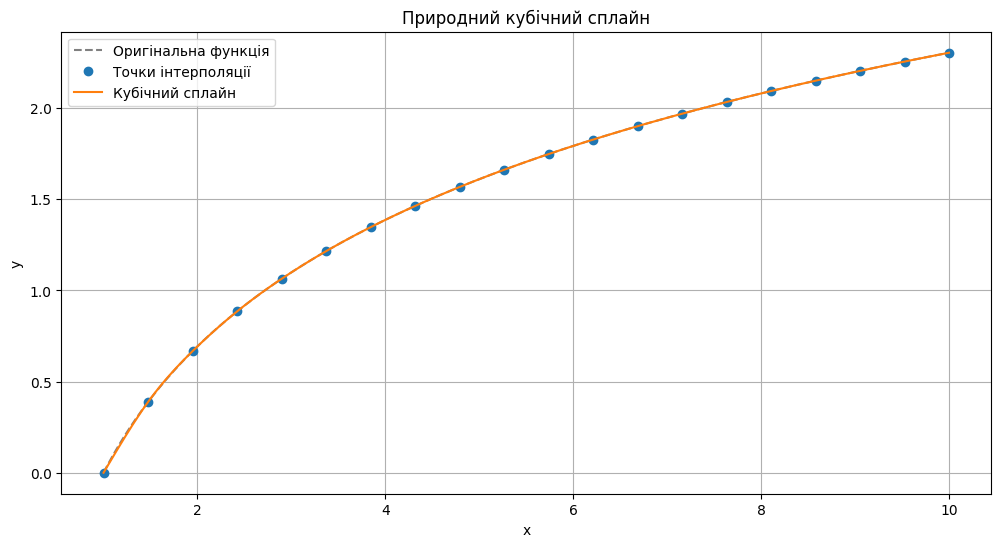

In [20]:
import numpy as np

def natural_cubic_spline(x, y):
    """
    Обчислює коефіцієнти природного кубічного сплайну.
    """
    n = len(x) - 1  # кількість сегментів
    
    # Обчислення h_i = x[i+1] - x[i]
    h = np.diff(x)
    
    # Формування матриці системи для знаходження коефіцієнтів c
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    # Заповнення матриці A та вектора b
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    # Граничні умови для природного сплайну
    A[0, 0] = 1
    A[n, n] = 1
    
    # Розв'язання системи для знаходження коефіцієнтів c
    c = np.linalg.solve(A, b)
    
    # Обчислення коефіцієнтів a, b та d
    a = y[:-1]
    d = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
    
    # Виведення коефіцієнтів у консоль
    print("\nКоефіцієнти природного кубічного сплайну:")
    print("----------------------------------------")
    for i in range(n):
        print(f"\nСплайн {i+1} на відрізку [{x[i]}, {x[i+1]}]:")
        print(f"S{i+1}(x) = {a[i]:.6f} + {b[i]:.6f}(x - {x[i]}) + {c[i]:.6f}(x - {x[i]})² + {d[i]:.6f}(x - {x[i]})³")
    
    return a, b, c[:-1], d

def evaluate_spline(x_points, x, a, b, c, d):
    """
    Обчислює значення сплайну в заданих точках.
    """
    y_points = np.zeros_like(x_points)
    
    for i in range(len(x_points)):
        idx = np.searchsorted(x, x_points[i]) - 1
        idx = max(0, min(idx, len(a)-1))
        dx = x_points[i] - x[idx]
        y_points[i] = a[idx] + b[idx]*dx + c[idx]*dx**2 + d[idx]*dx**3
        
    return y_points

def print_spline_values(x_points, y_points, num_points=10):
    """
    Виводить значення сплайну в заданих точках.
    """
    print("\nЗначення сплайну в контрольних точках:")
    print("----------------------------------------")
    step = max(1, len(x_points) // num_points)
    for i in range(0, len(x_points), step):
        print(f"x = {x_points[i]:6.2f} | y = {y_points[i]:6.2f}")

def generate_points(func, a, b, n):
    """
    Генерує точки на основі заданої функції та меж інтервалу.
    """
    x = np.linspace(a, b, n)
    y = func(x)
    return x, y

def print_table(x, y):
    """
    Виводить таблицю значень x та y.
    """
    print("\nТаблиця значень функції:")
    print("----------------------------------------")
    print("   i   |     x     |     y     ")
    print("----------------------------------------")
    for i in range(len(x)):
        print(f"  {i:2d}   | {x[i]:9.4f} | {y[i]:9.4f}")

# Приклад використання
if __name__ == "__main__":
    # Визначення функції (використовуємо np.log замість math.log)
    def test_function(x):
        return np.log(x)  # додаємо +1 щоб уникнути log(0)
    
    # Можна визначити іншу функцію, наприклад:
    # def test_function(x):
    #     return np.sin(x) * np.exp(-0.1 * x)
    # або
    # def test_function(x):
    #     return x**2 + 2*x - 1
    # або
    # def test_function(x):
    #     return np.cos(x) + x/3
    
    # Параметри інтерполяції
    a = 1  # ліва межа інтервалу
    b = 10  # права межа інтервалу
    n = 20  # кількість точок інтерполяції
    
    # Генерація точок
    x, y = generate_points(test_function, a, b, n)
    
    # Виведення таблиці значень
    print_table(x, y)
    
    # Обчислення коефіцієнтів сплайну
    a_coef, b_coef, c_coef, d_coef = natural_cubic_spline(x, y)
    
    # Створення точок для побудови графіка
    x_new = np.linspace(a, b, 200)
    y_new = evaluate_spline(x_new, x, a_coef, b_coef, c_coef, d_coef)
    
    # Виведення значень сплайну
    print_spline_values(x_new, y_new)
    
    # Візуалізація результатів
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    
    # Графік оригінальної функції
    x_orig = np.linspace(a, b, 1000)
    y_orig = test_function(x_orig)
    plt.plot(x_orig, y_orig, '--', label='Оригінальна функція', color='gray')
    
    # Графік сплайну та точок інтерполяції
    plt.plot(x, y, 'o', label='Точки інтерполяції')
    plt.plot(x_new, y_new, '-', label='Кубічний сплайн')
    
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Природний кубічний сплайн')
    plt.show()